<a href="https://colab.research.google.com/github/Chaithra12237/Program/blob/master/tomato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155208 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/New Plant Diseases '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/335da0b8-a52f-4a2a-8bce-cf98b53b2596___RS_Late.B 6220.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/3c813cf8-6949-4e1f-b812-3530e3ab5c8b___RS_Late.B 4828_flipLR.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/1f38b254-2338-4e4a-b772-2a8e60ca8bc0___GHLB2 Leaf 121.3_flipLR.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/38121028-f6a2-44f7-be49-5c4b7c296d1e___GHLB2 Leaf 9108.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/1f8743b6-f385-4464-9e41-48bd9fe85637___GHLB2 Leaf 8914_flipLR.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/25bfd51b-6db7-42a5-9990-992f52a0c836___GHLB2 Leaf 61.JPG
/content/drive/MyDrive/New Plant Diseases /train/Tomato___Late_blight/2fd3c2fb-ebd9-48f3-810a-8e365c0db1e2___RS_Late.B 5347_flipLR.JPG
/content/drive/MyDrive

In [ ]:
import os
os.chdir('/content/drive/MyDrive/New Plant Diseases ')
os.listdir()

['train',
 'val',
 '.ipynb_checkpoints',
 'labels.txt',
 'best_model.h5',
 'resnet_model.h5',
 'mobilenet_model.h5']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
train = datagen.flow_from_directory('./train', seed=123, subset='training')
val = datagen.flow_from_directory('./train', seed=123, subset='validation')

datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test = datagen2.flow_from_directory('/content/drive/MyDrive/New Plant Diseases /val')

Found 12845 images belonging to 10 classes.
Found 5500 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


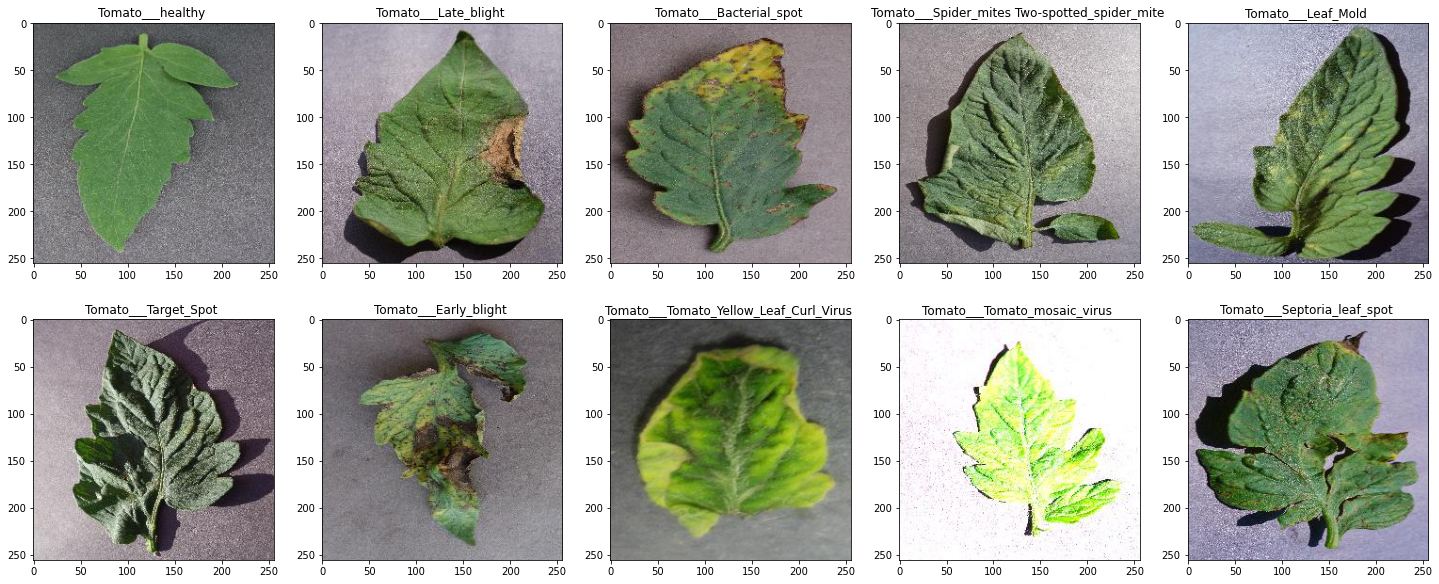

In [ ]:
classes = os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} '.format(i[1]))
    plt.imshow(image)
plt.show()

In [ ]:
def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [ ]:
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)
mc = ModelCheckpoint(filepath="resnet_model.h5", 
                     monitor= 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only=True)
cb= [es,mc]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
his=model.fit(train, batch_size=32, epochs=5, validation_data=val,callbacks = cb)

Epoch 1/5
402/402 [==============================] - ETA: 0s - loss: 0.4353 - accuracy: 0.8678
Epoch 1: val_accuracy improved from -inf to 0.95418, saving model to resnet_model.h5
402/402 [==============================] - 658s 2s/step - loss: 0.4353 - accuracy: 0.8678 - val_loss: 0.1400 - val_accuracy: 0.9542
Epoch 2/5
402/402 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9864
Epoch 2: val_accuracy improved from 0.95418 to 0.96582, saving model to resnet_model.h5
402/402 [==============================] - 626s 2s/step - loss: 0.0493 - accuracy: 0.9864 - val_loss: 0.1019 - val_accuracy: 0.9658
Epoch 3/5
402/402 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9959
Epoch 3: val_accuracy improved from 0.96582 to 0.97618, saving model to resnet_model.h5
402/402 [==============================] - 602s 1s/step - loss: 0.0185 - accuracy: 0.9959 - val_loss: 0.0760 - val_accuracy: 0.9762
Epoch 4/5
402/402 [==============================] - ETA: 

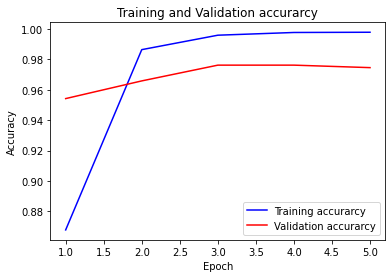

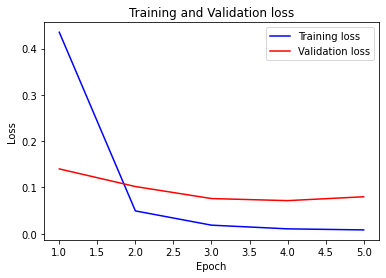

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
144/144 [==============================] - 2218s 15s/step - loss: 0.0586 - accuracy: 0.9821
Test Accuracy: 98.21155667304993


In [ ]:
from keras import models
model=models.load_model('/content/drive/MyDrive/New Plant Diseases /resnet_model.h5')

In [ ]:
predictions = model.predict_generator(test, steps=len(val), verbose=1)

172/172 [==============================] - 2500s 15s/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_labels = test.classes

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[38 53 30 36 40 39 43 45 52 49]
 [45 42 41 46 48 39 54 62 44 59]
 [44 53 45 50 39 47 38 43 47 57]
 [44 57 47 55 39 38 54 50 36 50]
 [36 37 43 41 46 45 42 62 45 39]
 [48 48 56 44 36 47 38 46 34 38]
 [37 45 43 49 47 44 45 40 52 55]
 [37 41 66 56 50 42 53 56 41 48]
 [41 56 48 51 47 47 45 37 44 32]
 [49 50 48 41 39 41 43 53 55 62]]


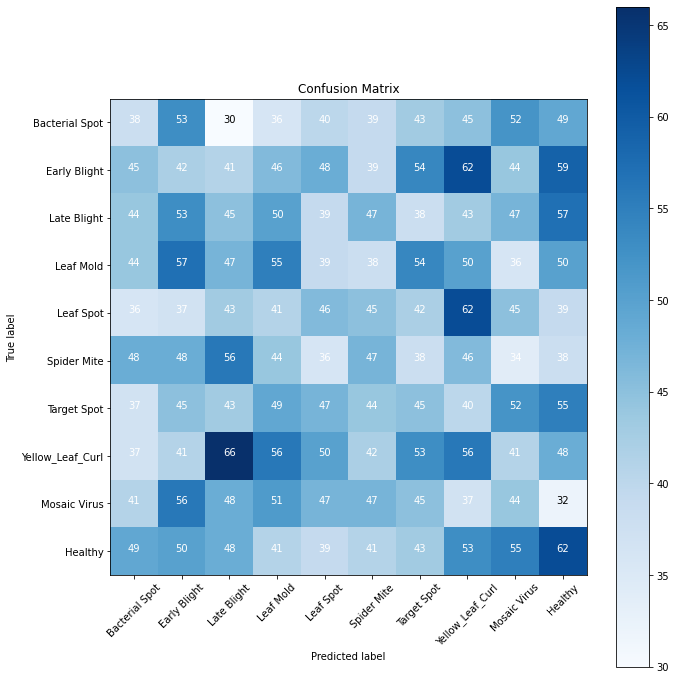

In [ ]:
import itertools
cm_plot_labels =  ['Bacterial Spot', 'Early Blight', 'Late Blight', 'Leaf Mold', 'Leaf Spot', 
               'Spider Mite', 'Target Spot', 'Yellow_Leaf_Curl', 'Mosaic Virus', 'Healthy']
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
y_true = test.classes
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

                  precision    recall  f1-score   support

  Bacterial Spot       0.09      0.09      0.09       425
    Early Blight       0.09      0.09      0.09       480
     Late Blight       0.10      0.10      0.10       463
       Leaf Mold       0.12      0.12      0.12       470
       Leaf Spot       0.11      0.11      0.11       436
     Spider Mite       0.11      0.11      0.11       435
     Target Spot       0.10      0.10      0.10       457
Yellow_Leaf_Curl       0.11      0.11      0.11       490
    Mosaic Virus       0.10      0.10      0.10       448
         Healthy       0.13      0.13      0.13       481

        accuracy                           0.10      4585
       macro avg       0.10      0.10      0.10      4585
    weighted avg       0.10      0.10      0.10      4585



In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/New Plant Diseases /resnet_model.h5")

In [ ]:
import os.path
if os.path.isfile('/content/drive/MyDrive/New Plant Diseases /resnet_model.h5') is False:
  model.save('/content/drive/MyDrive/New Plant Diseases /resnet_model.h5')